In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [10]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [11]:
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(X_test['Age_imputed'].isnull().sum()).values

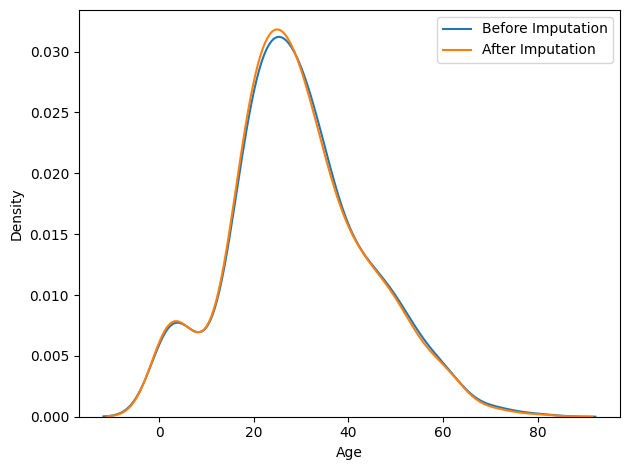

In [12]:
sns.kdeplot(X_train['Age'], label='Before Imputation')
sns.kdeplot(X_train['Age_imputed'], label='After Imputation')
plt.legend()
plt.tight_layout()

In [13]:
X_train.cov()

,Age,Fare,Age_imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,65.873164
Age_imputed,210.251707,65.873164,207.046476


<Axes: >

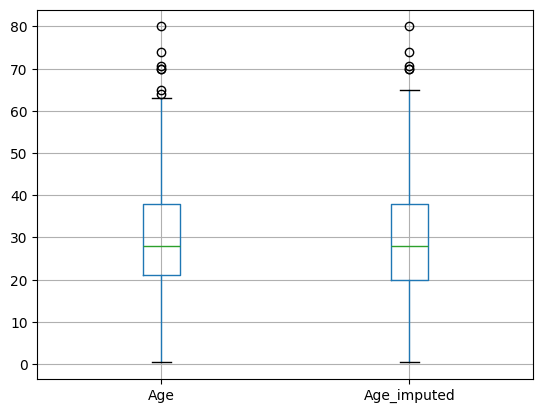

In [14]:
X_train[['Age', 'Age_imputed']].boxplot()

In [15]:
data = pd.read_csv('house-train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [16]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [17]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [18]:
X = data
y = data['SalePrice']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_train['GarageQual_imputed'] = X_train['GarageQual']

X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']
X_test['GarageQual_imputed'] = X_test['GarageQual']

In [23]:
X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu_imputed'].isnull().sum()).values
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(X_train['GarageQual_imputed'].isnull().sum()).values
                                                                                                                  
X_test.loc[X_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu_imputed'].isnull().sum()).values
X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(X_test['GarageQual_imputed'].isnull().sum()).values

In [77]:
temp = pd.concat(
    [
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ], axis=1)
temp.columns = ['Original', 'Imputed']

In [79]:
temp

,Original,Imputed
TA,0.951087,0.950342
Fa,0.032609,0.033390
Gd,0.011775,0.011986
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [89]:
temp = pd.concat(
    [
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
    ], axis=1)
temp.columns = ['Original', 'Imputed']

In [93]:
temp

,Original,Imputed
Gd,0.491143,0.492295
TA,0.405797,0.402397
Fa,0.043478,0.042808
Ex,0.033816,0.035103
Po,0.025765,0.027397


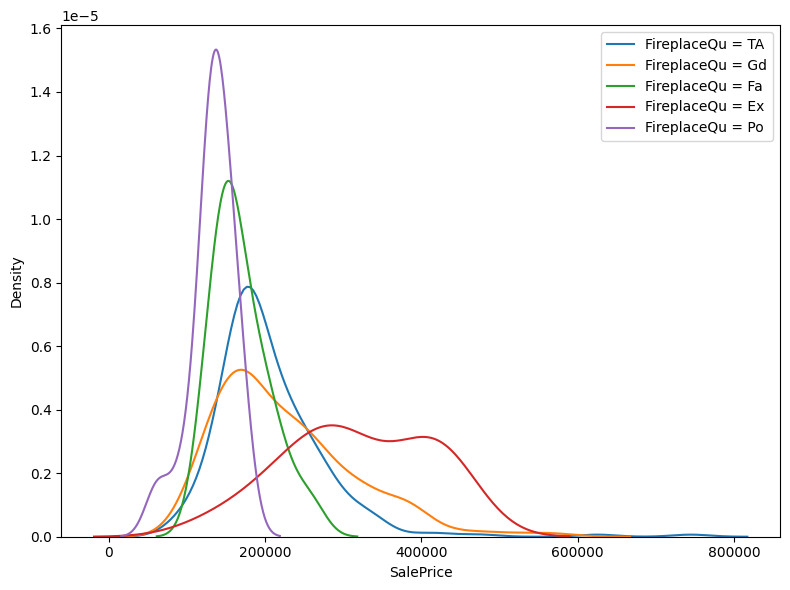

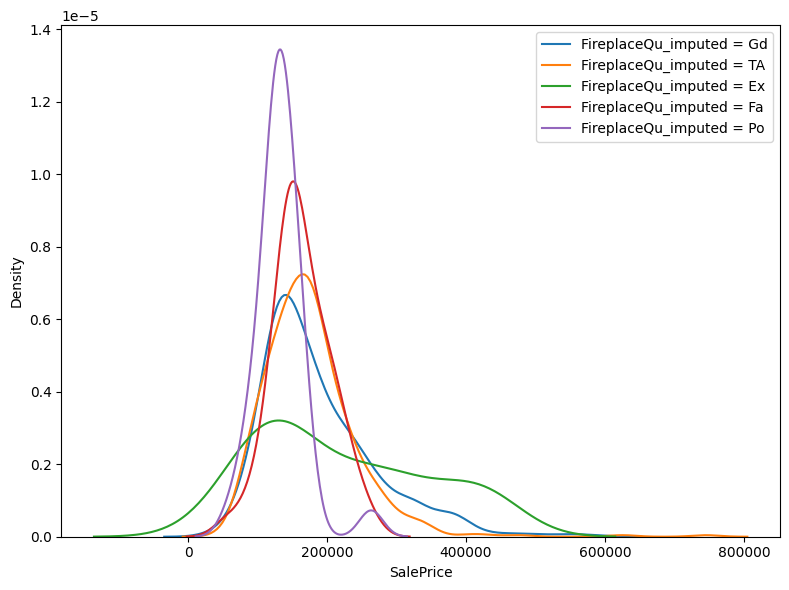

In [122]:
for plot in ['FireplaceQu', 'FireplaceQu_imputed']:
    plt.figure(figsize=(8,6))
    for cat in X_train[plot].dropna().unique():
        sns.kdeplot(
            X_train.loc[X_train[plot] == cat, 'SalePrice'], 
            label=f"{plot} = {cat}"
        )

    plt.legend()
    plt.xlabel("SalePrice")
    plt.tight_layout()
    plt.show()


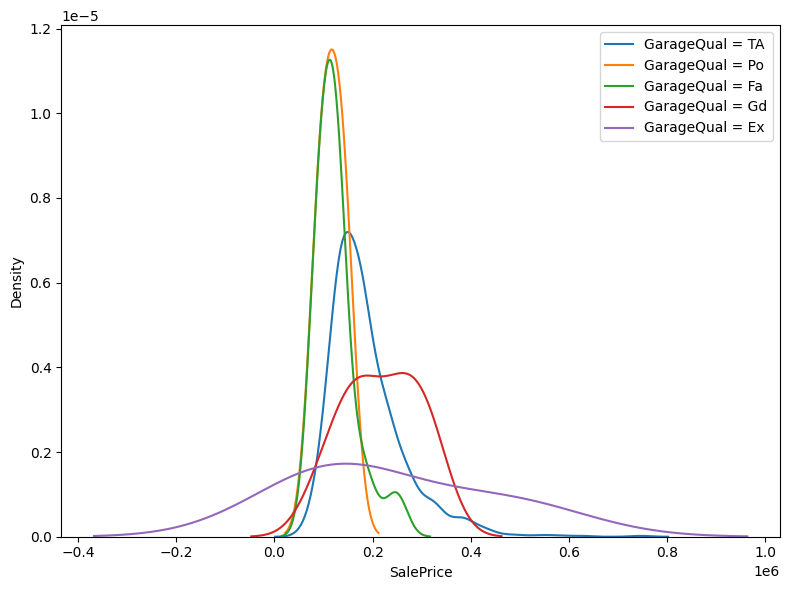

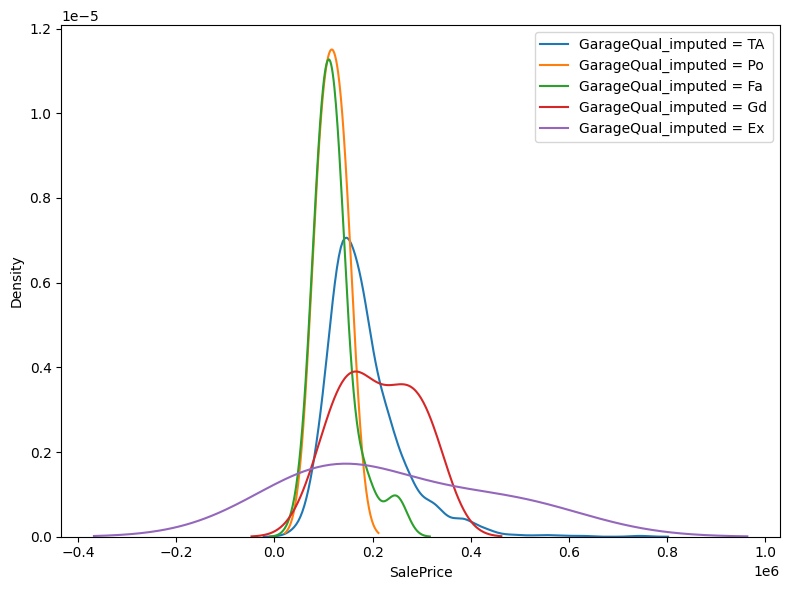

In [126]:
for plot in ['GarageQual', 'GarageQual_imputed']:
    plt.figure(figsize=(8,6))
    for cat in X_train[plot].dropna().unique():
        sns.kdeplot(
            X_train.loc[X_train[plot] == cat, 'SalePrice'], 
            label=f"{plot} = {cat}"
        )

    plt.legend()

    plt.xlabel("SalePrice")
    plt.tight_layout()
    plt.show()
